In [1]:
import pandas as pd

In [2]:
### loading train and test datasets

train_data = pd.read_csv(r'C:\Users\susmi\DSA\train.csv')
test_data  = pd.read_csv(r'C:\Users\susmi\DSA\test.csv')
submission_data = pd.read_csv(r'C:\Users\susmi\DSA\sample_submission.csv')

In [3]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


### You must do pre-processing separately on the train and test dataset. Do not combine them.

In [5]:
### finding missing values in train dataset

train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
### dropping the missing values in train dataset

train_data.dropna(inplace=True)

In [7]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
### finding missing values in test dataset

test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
### dropping the missing values in train dataset

test_data.dropna(inplace=True)

In [10]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [11]:
### identifying categorical variables 

cat_columns = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area']

In [12]:
cat_columns

['Gender',
 'Married',
 'Education',
 'Dependents',
 'Self_Employed',
 'Property_Area']

In [13]:
### one hot encoding for train and test dataset

train_data = pd.get_dummies(train_data, columns = cat_columns)
test_data  = pd.get_dummies(test_data, columns  = cat_columns)

In [14]:
train_data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,False,True,False,...,False,True,False,False,False,False,True,False,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,...,True,True,False,False,False,True,False,False,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,False,True,True,...,False,True,False,False,False,True,False,False,False,True
5,LP001011,5417,4196.0,267.0,360.0,1.0,Y,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Y,True,False,True,...,False,True,False,False,False,True,False,True,False,False
610,LP002979,4106,0.0,40.0,180.0,1.0,Y,False,True,False,...,False,False,False,False,True,True,False,True,False,False
611,LP002983,8072,240.0,253.0,360.0,1.0,Y,False,True,False,...,False,False,True,False,False,True,False,False,False,True
612,LP002984,7583,0.0,187.0,360.0,1.0,Y,False,True,False,...,False,False,False,True,False,True,False,False,False,True


In [15]:
test_data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
1,LP001022,3076,1500,126.0,360.0,1.0,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
2,LP001031,5000,1800,208.0,360.0,1.0,False,True,False,True,...,False,False,False,True,False,True,False,False,False,True
4,LP001051,3276,0,78.0,360.0,1.0,False,True,True,False,...,True,True,False,False,False,True,False,False,False,True
5,LP001054,2165,3422,152.0,360.0,1.0,False,True,False,True,...,True,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,2269,2167,99.0,360.0,1.0,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
362,LP002971,4009,1777,113.0,360.0,1.0,False,True,False,True,...,True,False,False,False,True,False,True,False,False,True
363,LP002975,4158,709,115.0,360.0,1.0,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
365,LP002986,5000,2393,158.0,360.0,1.0,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False


In [16]:
### scaling

from sklearn.preprocessing import StandardScaler

In [17]:
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [18]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [19]:
scaler = StandardScaler()

In [20]:
train_data[num_columns] = scaler.fit_transform(train_data[num_columns])

In [21]:
train_data[num_columns]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,-0.137970,-0.027952,-0.208089,0.275542,0.413197
2,-0.417536,-0.604633,-0.979001,0.275542,0.413197
3,-0.491180,0.297100,-0.307562,0.275542,0.413197
4,0.112280,-0.604633,-0.046446,0.275542,0.413197
5,0.009319,0.999978,1.520245,0.275542,0.413197
...,...,...,...,...,...
609,-0.435196,-0.604633,-0.916831,0.275542,0.413197
610,-0.222210,-0.604633,-1.302286,-2.487549,0.413197
611,0.478206,-0.512854,1.346168,0.275542,0.413197
612,0.391846,-0.604633,0.525520,0.275542,0.413197


In [22]:
test_data[num_columns] = scaler.transform(test_data[num_columns])

In [23]:
test_data[num_columns]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.062831,-0.604633,-0.431902,0.275542,0.413197
1,-0.404114,-0.031011,-0.232957,0.275542,0.413197
2,-0.064325,0.083713,0.786636,0.275542,0.413197
4,-0.368793,-0.604633,-0.829792,0.275542,0.413197
5,-0.565001,0.703989,0.090328,0.275542,0.413197
...,...,...,...,...,...
361,-0.546634,0.224059,-0.568677,0.275542,0.413197
362,-0.239341,0.074917,-0.394600,0.275542,0.413197
363,-0.213027,-0.333501,-0.369732,0.275542,0.413197
365,-0.064325,0.310485,0.164933,0.275542,0.413197


### Do the following steps
### o Exploratory Data Analysis
### o Pre-processing
### o Modelling
### o Fine tuning
### o Do not remove rows from dataset

### 1. Exploratory Data Analysis 

In [24]:
### exploratory data analysis

import matplotlib.pyplot as plt
import seaborn as sns

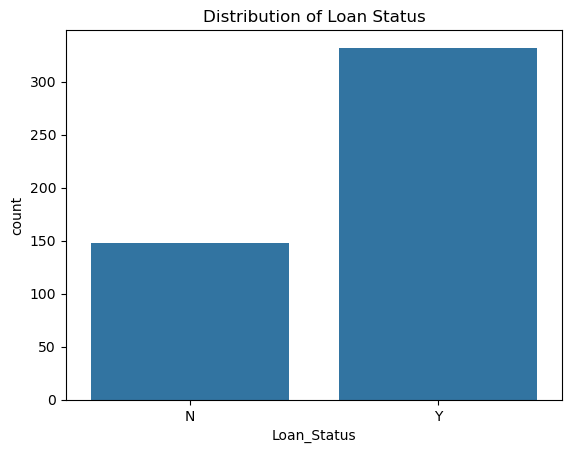

In [25]:
sns.countplot(x = 'Loan_Status', data = train_data)
plt.title('Distribution of Loan Status')
plt.show()

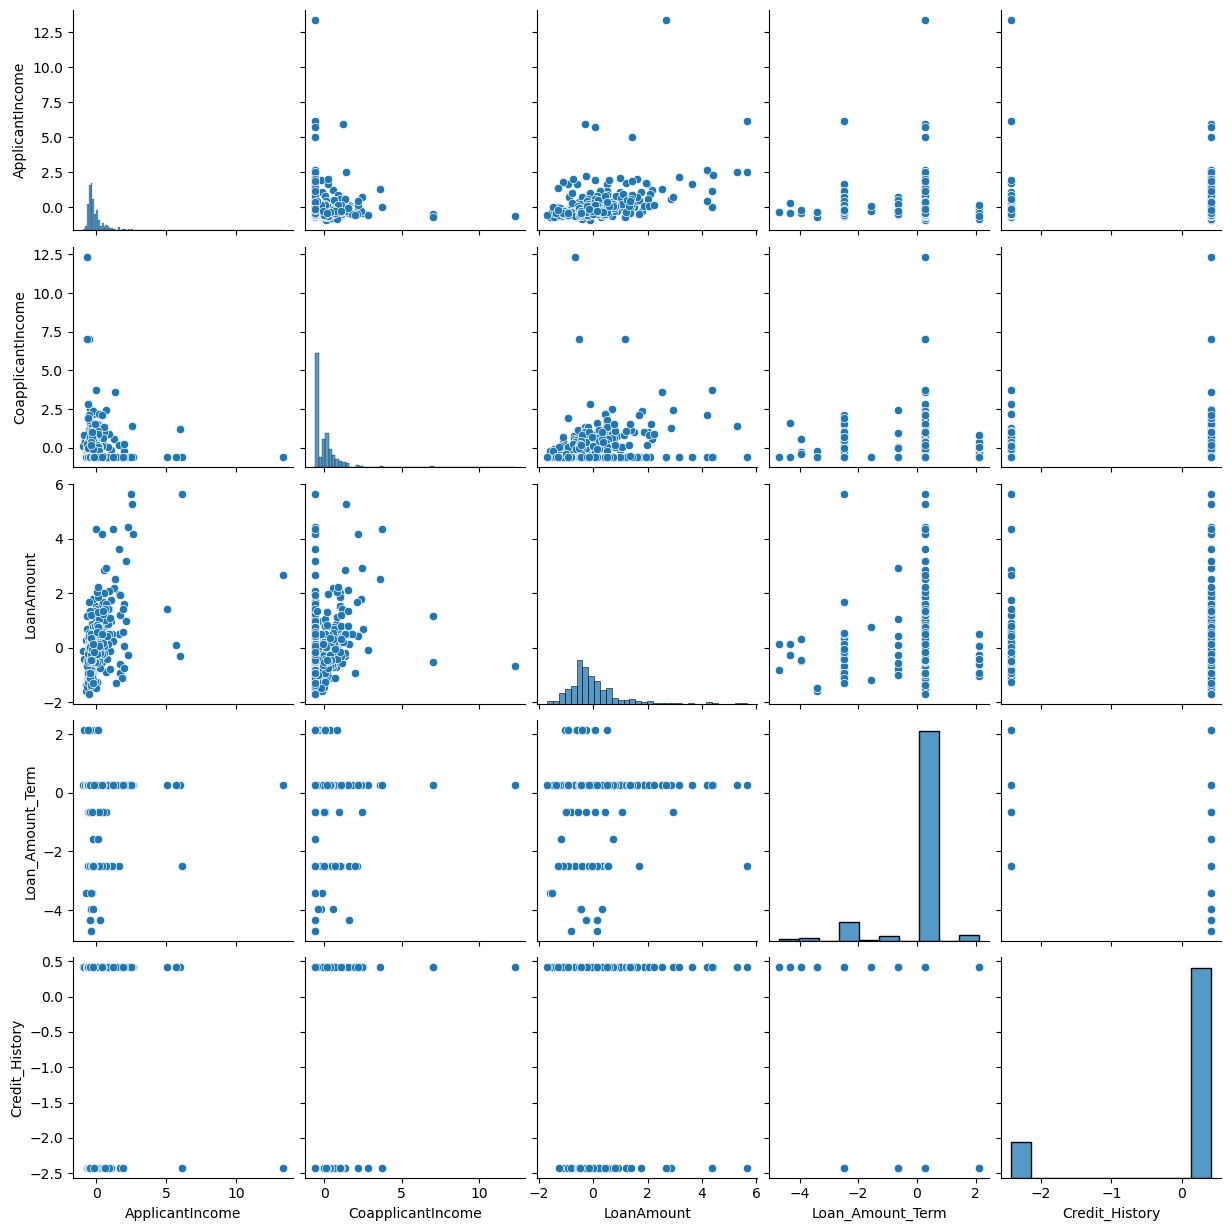

In [26]:
sns.pairplot(train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
plt.show()

### 2. Pre-Processing

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
### fit train and test dataset

fit_data = pd.concat([train_data, test_data], axis=0)

In [29]:
fit_data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,-0.137970,-0.027952,-0.208089,0.275542,0.413197,N,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,LP001005,-0.417536,-0.604633,-0.979001,0.275542,0.413197,Y,False,True,False,...,False,True,False,False,False,False,True,False,False,True
3,LP001006,-0.491180,0.297100,-0.307562,0.275542,0.413197,Y,False,True,False,...,True,True,False,False,False,True,False,False,False,True
4,LP001008,0.112280,-0.604633,-0.046446,0.275542,0.413197,Y,False,True,True,...,False,True,False,False,False,True,False,False,False,True
5,LP001011,0.009319,0.999978,1.520245,0.275542,0.413197,Y,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,-0.546634,0.224059,-0.568677,0.275542,0.413197,NaN,False,True,False,...,False,False,True,False,False,True,False,False,True,False
362,LP002971,-0.239341,0.074917,-0.394600,0.275542,0.413197,NaN,False,True,False,...,True,False,False,False,True,False,True,False,False,True
363,LP002975,-0.213027,-0.333501,-0.369732,0.275542,0.413197,NaN,False,True,False,...,False,True,False,False,False,True,False,False,False,True
365,LP002986,-0.064325,0.310485,0.164933,0.275542,0.413197,NaN,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [30]:
### handling missing values

fit_data.fillna(method='ffill', inplace=True) 

C:\Users\susmi\AppData\Local\Temp\ipykernel_23248\1414613043.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fit_data.fillna(method='ffill', inplace=True)


In [31]:
fit_data.isna().sum()

Loan_ID                    0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_model = LabelEncoder()

In [34]:
label_model

LabelEncoder()

In [35]:
### scaling

scaler_model = StandardScaler()

In [36]:
scaler_model

StandardScaler()

In [37]:
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [38]:
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [39]:
fit_data[num_features] = scaler.fit_transform(fit_data[num_features])

In [40]:
fit_data[num_features]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,-0.094784,-0.021068,-0.187346,0.271331,0.421476
2,-0.390107,-0.617811,-1.032088,0.271331,0.421476
3,-0.467902,0.315293,-0.296345,0.271331,0.421476
4,0.169571,-0.617811,-0.010223,0.271331,0.421476
5,0.060807,1.042623,1.706510,0.271331,0.421476
...,...,...,...,...,...
361,-0.526482,0.239711,-0.582467,0.271331,0.421476
362,-0.201869,0.085381,-0.391719,0.271331,0.421476
363,-0.174071,-0.337247,-0.364470,0.271331,0.421476
365,-0.016988,0.329143,0.221400,0.271331,0.421476


### split the dataset return to train and test datssets

In [41]:
train_data = fit_data.iloc[:train_data.shape[0], :]

In [42]:
train_data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,-0.094784,-0.021068,-0.187346,0.271331,0.421476,N,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,LP001005,-0.390107,-0.617811,-1.032088,0.271331,0.421476,Y,False,True,False,...,False,True,False,False,False,False,True,False,False,True
3,LP001006,-0.467902,0.315293,-0.296345,0.271331,0.421476,Y,False,True,False,...,True,True,False,False,False,True,False,False,False,True
4,LP001008,0.169571,-0.617811,-0.010223,0.271331,0.421476,Y,False,True,True,...,False,True,False,False,False,True,False,False,False,True
5,LP001011,0.060807,1.042623,1.706510,0.271331,0.421476,Y,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,-0.408763,-0.617811,-0.963964,0.271331,0.421476,Y,True,False,True,...,False,True,False,False,False,True,False,True,False,False
610,LP002979,-0.183772,-0.617811,-1.386334,-2.485399,0.421476,Y,False,True,False,...,False,False,False,False,True,True,False,True,False,False
611,LP002983,0.556122,-0.522839,1.515762,0.271331,0.421476,Y,False,True,False,...,False,False,True,False,False,True,False,False,False,True
612,LP002984,0.464894,-0.617811,0.616521,0.271331,0.421476,Y,False,True,False,...,False,False,False,True,False,True,False,False,False,True


In [43]:
test_data = fit_data.iloc[train_data.shape[0]:, :]

In [44]:
test_data

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0.117334,-0.617811,-0.432594,0.271331,0.421476,N,False,True,False,...,False,True,False,False,False,True,False,False,False,True
1,LP001022,-0.375928,-0.024233,-0.214596,0.271331,0.421476,N,False,True,False,...,False,False,True,False,False,True,False,False,False,True
2,LP001031,-0.016988,0.094482,0.902643,0.271331,0.421476,N,False,True,False,...,False,False,False,True,False,True,False,False,False,True
4,LP001051,-0.338617,-0.617811,-0.868590,0.271331,0.421476,N,False,True,True,...,True,True,False,False,False,True,False,False,False,True
5,LP001054,-0.545884,0.736337,0.139650,0.271331,0.421476,N,False,True,False,...,True,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,-0.526482,0.239711,-0.582467,0.271331,0.421476,N,False,True,False,...,False,False,True,False,False,True,False,False,True,False
362,LP002971,-0.201869,0.085381,-0.391719,0.271331,0.421476,N,False,True,False,...,True,False,False,False,True,False,True,False,False,True
363,LP002975,-0.174071,-0.337247,-0.364470,0.271331,0.421476,N,False,True,False,...,False,True,False,False,False,True,False,False,False,True
365,LP002986,-0.016988,0.329143,0.221400,0.271331,0.421476,N,False,True,False,...,False,True,False,False,False,True,False,True,False,False


### 3. Modelling

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

In [47]:
### splitting dataset into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
172,LP001586,-0.292723,-0.617811,-0.827715,-2.485399,0.421476,False,True,False,True,...,True,False,False,False,True,True,False,True,False,False
288,LP001931,-0.180414,-0.617811,-0.364470,0.271331,0.421476,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
607,LP002964,-0.205973,-0.059452,0.207775,0.271331,0.421476,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
55,LP001194,-0.444582,-0.156008,-0.609717,0.271331,0.421476,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
461,LP002484,0.494184,-0.617811,-0.187346,-2.485399,0.421476,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,LP001498,0.060807,-0.617811,0.357648,0.271331,0.421476,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
350,LP002139,0.744733,-0.617811,1.175140,0.271331,0.421476,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
445,LP002429,-0.303170,-0.138992,-0.160097,0.271331,0.421476,False,True,False,True,...,False,False,True,False,False,False,True,True,False,False
558,LP002798,-0.224629,0.438361,0.275899,0.271331,0.421476,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [49]:
y_train

172    N
288    Y
607    Y
55     Y
461    Y
      ..
141    Y
350    Y
445    Y
558    Y
137    Y
Name: Loan_Status, Length: 384, dtype: object

In [50]:
### random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [51]:
X_train = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train = train_data['Loan_Status']
X_test  = test_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_test  = test_data['Loan_Status']

In [52]:
model = RandomForestClassifier()

In [53]:
### fitting the model

model.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
### prediction

y_pred = model.predict(X_test)

In [55]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N

In [56]:
### accuracy

from sklearn.metrics import accuracy_score

In [57]:
accuracy = accuracy_score(y_test, y_pred)

In [58]:
accuracy

0.2179930795847751

### 4. Fine-tuning

In [59]:
### importing library

from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
       }

In [61]:
param_grid

{'n_estimators': [50, 100, 150],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [62]:
### search grid

search_grid = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                           param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [63]:
search_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [64]:
best_params = search_grid.best_params_

In [65]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150}

In [66]:
### train the model

best_model = search_grid.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=150,
                       random_state=42)

In [67]:
### prediction

y_pred_new = best_model.predict(X_test)

In [68]:
y_pred_new

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N

In [69]:
accuracy_new = accuracy_score(y_test, y_pred_new)

In [70]:
accuracy_new

0.15916955017301038

### Once you get the best model, upload the sample submission file      python.

In [71]:
import numpy as np

In [72]:
X_train = submission_data.drop('Loan_ID', axis=1)

In [73]:
label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

In [74]:
y_train = submission_data['Loan_Status']

In [75]:
model = RandomForestClassifier()

In [76]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
test_prediction = model.predict(X_train)

### Replace the 'Loan_Status' column with the predictions

In [78]:
submission_data['Loan_Status'] = test_prediction

### Save this new dataset as a csv file (search for the code in internet).

In [79]:
submission_data[['Loan_ID', 'Loan_Status']].to_csv('sample_submission_new.csv', index=False)

In [80]:
submission_data_new = pd.read_csv(r'C:\Users\susmi\DSA\sample_submission_new.csv')

In [81]:
submission_data_new

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N
